# Multiple Linear Regression
Here we use linear regression for  a very simple dataset '50_Startups.csv' that contains data of some startup companies and have only 50 entries. The main focus is learning how to do linear regression and that dataset is simple so handling it is easier and doesn't come on the way. Deeper introduction to linear regression can be foundfor example from https://towardsdatascience.com/the-complete-guide-to-linear-regression-in-python-3d3f8f06bf8 .

In the linear regression model the  question is to find good coeffients $\beta_0, \beta_1, \beta_2, ..., \beta_n$ such that
$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_n x_n $$
describe as well as possible the given data. In our case $x$ variables (so called independent variables) are  R&D Spend, Administration  cost, Marketing Spend and State. The y variable (alias dependant variable) is the profit of the company. This model then gives a possibility to predict $y$ when $x$'s are known.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv('Data/50_Startups.csv')

In [ ]:
# Checking data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [ ]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

The data looks good. It doesn't have any nan values or any abnormalities. State is a caterogical variable, so we need to encode. We use one hot encoding method, because there are three possible values and they don't have any order. 

In [3]:
dataset = pd.get_dummies(dataset)
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


Nest we separate  x 's and  y . So  y  will be the profit and everything else goes to  X . We use capital  X  because it contains more than just one variable. It is actually a matrix of values. Also we change from dataframes to numpy arrays because we only need the numerical values and not any indexies from now on. 

In [4]:
X = dataset.drop(['Profit'], axis = 1).to_numpy()
y = dataset['Profit'].to_numpy()

In [ ]:
print(X)

[[1.6534920e+05 1.3689780e+05 4.7178410e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.3187690e+05 9.9814710e+04 3.6286136e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.3461546e+05 1.4719887e+05 1.2771682e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.2054252e+05 1.4871895e+05 3.1161329e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.2333488e+05 1.0867917e+05 3.0498162e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.0067196e+05 9.179

In [ ]:
print(y)

[192261.83 191792.06 191050.39 182901.99 166187.94 156991.12 156122.51
 155752.6  152211.77 149759.96 146121.95 144259.4  141585.52 134307.35
 132602.65 129917.04 126992.93 125370.37 124266.9  122776.86 118474.03
 111313.02 110352.25 108733.99 108552.04 107404.34 105733.54 105008.31
 103282.38 101004.64  99937.59  97483.56  97427.84  96778.92  96712.8
  96479.51  90708.19  89949.14  81229.06  81005.76  78239.91  77798.83
  71498.49  69758.98  65200.33  64926.08  49490.75  42559.73  35673.41
  14681.4 ]


## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0) 

In [ ]:
print(X_test)

[[6.6051520e+04 1.8264556e+05 1.1814820e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.0067196e+05 9.1790610e+04 2.4974455e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0191308e+05 1.1059411e+05 2.2916095e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [2.7892920e+04 8.4710770e+04 1.6447071e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [7.2107600e+04 1.2786455e+05 3.5318381e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [2.0229590e+04 6.5947930e+04 1.8526510e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [6.1136380e+04 1.5270192e+05 8.8218230e+04 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [7.3994560e+04 1.2278275e+05 3.0331926e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]


## Training the Multiple Linear Regression model on the Training set
We now do our first linear regression model using skicit-learns LinearRegression package.


In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
print("Linear regression model is:")
print(f"Profit = {round(regressor.intercept_,3)} + {round(regressor.coef_[0],3)}*R&D Spend \
+ {round(regressor.coef_[1],3)}*Administration + {round(regressor.coef_[2],3)}*Marketing Spend \
+ {round(regressor.coef_[3],3)}* California + {round(regressor.coef_[4],3)}* New York \
+ {round(regressor.coef_[5],3)}* Florida")


Linear regression model is:
Profit = 42467.529 + 0.773*R&D Spend + 0.033*Administration + 0.037*Marketing Spend + 86.638* California + -872.646* New York + 786.007* Florida


This is not probably the best possible Linear regression model. First of all because the last three are so called dummy variables and one of them depends on the other two, we can easily remove the one value out of our model. Secondly we should test if all those variables really have a significant effect to our profit. But before we do it let's compare the predicted values and the given values in the test set.


## Predicting the Test set results

In [7]:
y_pred = regressor.predict(X_test)
result_data = np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)), axis = 1)
results = pd.DataFrame(result_data, columns=['Test set value', 'Prediction'])
results['Difference %'] = (results['Prediction']-results['Test set value'])/results['Test set value'] * 100
results

,Test set value,Prediction,Difference %
0,103282.38,103015.201598,-0.258687
1,144259.40,132582.277608,-8.094531
2,146121.95,132447.738452,-9.358082
3,77798.83,71976.098513,-7.484343
4,191050.39,178537.482211,-6.549533
5,105008.31,116161.242302,10.621000
6,81229.06,67851.692097,-16.468697
7,97483.56,98791.733747,1.341943
8,110352.25,113969.435330,3.277854
9,166187.94,167921.065696,1.042871


In [ ]:
print(f"The average difference is {round(results['Difference %'].mean(),2)} %.")

The average difference is -3.19 %.


Pretty good values we got. Biggest difference between predicted and the given value was about 16 %. And in average the predicted value was only about 3,2 % off.

Next we shall see if we can do this model better by backward elimination. To get better statistics how well our model does we need to use statsmodels package and from there OLS (ordinary least squares) method for calculating the linear regression model.

## Optimizing the model
Just out of curiosity, let's run OLS without taking into account that the dummy variables are dependant of each others. Let's see if we get same coefficients as above.

In [8]:
import statsmodels.api as sm
Xs = sm.add_constant(X_train) #Need to add column of constant 1's, so that we get \beta_0 coeffient.
Xs = np.array(Xs, dtype =float) # Needed to add this to make Xs's elemnts same type as y_train. Before this y_train type float64 and Xs float.
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.91e-21
Time:                        13:07:11   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.185e+04   6192.057      5.144      0.0

In [9]:
X_test = sm.add_constant(X_test)
y_pred = regressor.predict(X_test)
results['Prediction2'] = y_pred
results[['Prediction','Prediction2']]

,Prediction,Prediction2
0,103015.201598,103015.201598
1,132582.277608,132582.277609
2,132447.738452,132447.738453
3,71976.098513,71976.098511
4,178537.482211,178537.482212
5,116161.242302,116161.242300
6,67851.692097,67851.692095
7,98791.733747,98791.733747
8,113969.435330,113969.435329
9,167921.065696,167921.065697


We got same predictions with OLS as with LinearRegression altought the constant and the coefficients of state dummy columns vary. This is caused by the fact that they are linearly dependent. Next we will remove this so called dummy trap and see how it effects the situation.

In [10]:
Xs = Xs[:,:-1]
print(Xs)

[[1.0000000e+00 5.5493950e+04 1.0305749e+05 2.1463481e+05 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 4.6014020e+04 8.5047440e+04 2.0551764e+05 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 7.5328870e+04 1.4413598e+05 1.3405007e+05 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 4.6426070e+04 1.5769392e+05 2.1079767e+05 1.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 9.1749160e+04 1.1417579e+05 2.9491957e+05 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 1.3029813e+05 1.4553006e+05 3.2387668e+05 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 1.1994324e+05 1.5654742e+05 2.5651292e+05 0.0000000e+00
  1.0000000e+00]
 [1.0000000e+00 1.0002300e+03 1.2415304e+05 1.9039300e+03 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 5.4205000e+02 5.1743150e+04 0.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 6.5605480e+04 1.5303206e+05 1.0713838e+05 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 1.1452361e+05 1.2261684e+05 2.6177623e+05 0.0000000e+00
  0.0000000e+00]
 [1.0000000e+00 6.199

In [11]:
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     129.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           3.91e-21
Time:                        13:07:34   Log-Likelihood:                -421.10
No. Observations:                  40   AIC:                             854.2
Df Residuals:                      34   BIC:                             864.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.325e+04   8315.816      5.201      0.0

In [12]:
X_test = X_test[:,:-1] #Removing the same dummy variable from here.
y_pred3 = regressor.predict(X_test)
results['Prediction 3'] = y_pred3
results[['Prediction','Prediction2', 'Prediction 3']]

,Prediction,Prediction2,Prediction 3
0,103015.201598,103015.201598,103015.201598
1,132582.277608,132582.277609,132582.277609
2,132447.738452,132447.738453,132447.738453
3,71976.098513,71976.098511,71976.098512
4,178537.482211,178537.482212,178537.482212
5,116161.242302,116161.242300,116161.242300
6,67851.692097,67851.692095,67851.692095
7,98791.733747,98791.733747,98791.733747
8,113969.435330,113969.435329,113969.435329
9,167921.065696,167921.065697,167921.065697


As you can see, removing one dummy variable didn't effect the model, since it value was completely dependent on the other two dummies. Now we can optimize the model. 

## Backward elimination
The optimization here means that we take away values that really don't have significant effect on the model. This signifigance can be measured with p-value of the variable. The summary of OLS -model lists the p-values. If p-value is over 0.05 is not considered being significant. We now reduce one by one variables until we are left with only significant ones. This is called the backward elimination.

Latest summary report said, that x4 has the highest p-value. It is actually one of the dummy variables colums, but let's remove it and see what happens.

In [13]:
Xs = Xs[:,[0,1,2,3,5]] # x4 removed
X_test = X_test[:,[0,1,2,3,5]]
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     166.7
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           2.87e-22
Time:                        13:12:11   Log-Likelihood:                -421.12
No. Observations:                  40   AIC:                             852.2
Df Residuals:                      35   BIC:                             860.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.292e+04   8020.397      5.352      0.0

In [14]:
y_pred = regressor.predict(X_test)
results['Prediction'] = y_pred
results['Difference %'] = (results['Prediction']-results['Test set value'])/results['Test set value'] * 100
results[['Test set value','Prediction','Difference %']]

,Test set value,Prediction,Difference %
0,103282.38,102978.262439,-0.294453
1,144259.40,132979.340265,-7.819289
2,146121.95,132521.052857,-9.307908
3,77798.83,71952.387250,-7.514821
4,191050.39,178668.352492,-6.481032
5,105008.31,115738.444727,10.218367
6,81229.06,67439.975156,-16.975556
7,97483.56,98397.738039,0.937777
8,110352.25,113956.003258,3.265682
9,166187.94,168051.967138,1.121638


In [15]:
print(f"The average difference is {round(results['Difference %'].mean(),2)} %.")

The average difference is -3.28 %.


The difference is only slightly bigger, but the predicted results are still good. Next variable to drop is the last state variable. It seems that the knowledge about in which state the startup is doesn't really matter. 

In [16]:
Xs = Xs[:,[0,1,2,3]] 
X_test = X_test[:,[0,1,2,3]]
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     227.8
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.85e-23
Time:                        13:15:13   Log-Likelihood:                -421.19
No. Observations:                  40   AIC:                             850.4
Df Residuals:                      36   BIC:                             857.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.299e+04   7919.773      5.428      0.0

In [17]:
y_pred = regressor.predict(X_test)
results['Prediction'] = y_pred
results['Difference %'] = (results['Prediction']-results['Test set value'])/results['Test set value'] * 100
results[['Test set value','Prediction','Difference %']]

,Test set value,Prediction,Difference %
0,103282.38,103901.896970,0.599828
1,144259.40,132763.059931,-7.969214
2,146121.95,133567.903700,-8.591486
3,77798.83,72911.789767,-6.281637
4,191050.39,179627.925672,-5.978770
5,105008.31,115166.648648,9.673843
6,81229.06,67113.576906,-17.377381
7,97483.56,98154.806868,0.688574
8,110352.25,114756.115552,3.990735
9,166187.94,169064.014088,1.730615


In [18]:
print(f"The average difference is {round(results['Difference %'].mean(),2)} %.")

The average difference is -2.95 %.


So removing even the last state didn't make the model bad. There is still a column that's p-value is over 0.05. The Administration column has p-value 0.65. so let's remove that.

In [19]:
Xs = Xs[:,[0,1,3]] # Administration removed
X_test = X_test[:,[0,1,3]]
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     349.0
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           9.65e-25
Time:                        13:17:53   Log-Likelihood:                -421.30
No. Observations:                  40   AIC:                             848.6
Df Residuals:                      37   BIC:                             853.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.635e+04   2971.236     15.598      0.0

In [20]:
y_pred = regressor.predict(X_test)
results['Prediction'] = y_pred
results['Difference %'] = (results['Prediction']-results['Test set value'])/results['Test set value'] * 100
results[['Test set value','Prediction','Difference %']]

,Test set value,Prediction,Difference %
0,103282.38,102284.646052,-0.966025
1,144259.40,133873.923838,-7.199168
2,146121.95,134182.149517,-8.171120
3,77798.83,73701.106936,-5.267075
4,191050.39,180642.252997,-5.447849
5,105008.31,114717.249039,9.245877
6,81229.06,68335.075753,-15.873610
7,97483.56,97433.459223,-0.051394
8,110352.25,114580.921365,3.831976
9,166187.94,170343.319795,2.500410


In [21]:
print(f"The average difference is {round(results['Difference %'].mean(),2)} %.")

The average difference is -2.74 %.


The linear model is still very good. Even in summary R-squared value is still 0.95. There are still a variable that's p-value is over 0.05. It is the column that contains Marketing Spendings. Let's see what happens when we remove that.

In [22]:
Xs = Xs[:,[0,1]] # Marketing Spend removed
X_test = X_test[:,[0,1]]
regressor = sm.OLS(y_train,Xs).fit()
print(regressor.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     652.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):           1.56e-25
Time:                        13:23:30   Log-Likelihood:                -423.09
No. Observations:                  40   AIC:                             850.2
Df Residuals:                      38   BIC:                             853.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.842e+04   2842.717     17.032      0.0

In [23]:
y_pred = regressor.predict(X_test)
results['Prediction'] = y_pred
results['Difference %'] = (results['Prediction']-results['Test set value'])/results['Test set value'] * 100
results[['Test set value','Prediction','Difference %']]

,Test set value,Prediction,Difference %
0,103282.38,104667.278060,1.340885
1,144259.40,134150.834106,-7.007215
2,146121.95,135207.800195,-7.469206
3,77798.83,72170.544289,-7.234409
4,191050.39,179090.586025,-6.260026
5,105008.31,109824.773866,4.586745
6,81229.06,65644.277738,-19.186215
7,97483.56,100481.432771,3.075260
8,110352.25,111431.752024,0.978233
9,166187.94,169438.148435,1.955743


In [24]:
print(f"The average difference is {round(results['Difference %'].mean(),2)} %.")

The average difference is -3.52 %.


Basically we have now a simple linear model. And it seems that most important value for looking how startup's do is how much they put money in R&D.

Let's visualize this model.

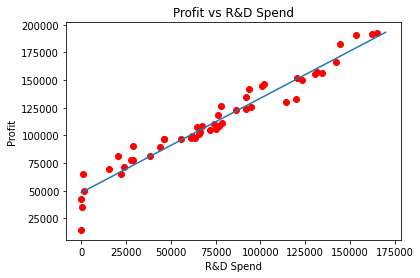

In [36]:
x_values= np.arange(0.0, 175000.0, 10000.0)
plt.plot(x_values, regressor.predict(sm.add_constant(x_values))) # Plotting the model
plt.scatter(Xs[:,1], y_train, c='red') # Plotting the data used for calculations
plt.scatter(X_test[:,1], y_test, c= 'red') #plotting also the test data
plt.title('Profit vs R&D Spend')
plt.ylabel('Profit')
plt.xlabel('R&D Spend');

As we see that in this case the simple linear model really did do already the job. But as I said in the beginning this data set was really small and therefore we cannot draw any really conclusions about the situation in reality, but at least for this 50 startups the money used for R&D was the biggest contributer for when we want to predict the profit of the company.